# Boat Listing Survey

### Company Background

Nearly New Nautical is a website that allows users to advertise their used boats for sale. When users list their boat, they have to provide a range of information about their boat. Boats that get lots of views bring more traffic to the website, and more potential customers. 

To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views.




### Customer Question

The product manager wants to know the following:
- Can you predict the number of views a listing will receive based on the boat's features?



### Success Criteria

The product manager would consider using your model if, on average, the predictions were only 50% off of the true number of views a listing would receive.


### Dataset

The data you will use for this analysis can be accessed here: `"data/boat_data.csv"`

- Price 
Character, boat price listed in different currencies (e.g. EUR, Â£,
CHF etc.) on the website
- Boat Type 
Character, type of the boat
- Manufacturer 
Character, manufacturer of the boat
- Type 
Character, condition of the boat and engine type (e.g. Diesel,
Unleaded, etc.)
- Year Built 
Numeric, year of the boat built
- Length 
Numeric, length in meter of the boat
- Width 
Numeric, width in meter of the boat
- Material 
Character, material of the boat (e.g. GRP, PVC, etc.)
- Location 
Character, location of the boat is listed
- Number of views last 7 days
Numeric, number of the views of the list last 7 days

## Data validation

Let's start with loading, cleaning, and preparing data for further analysis and model training.

We'll import the dataset, look at the first rows, explore the number of missing values and data types in different columns.

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
sns.set(palette = 'Set3')

In [396]:
raw_data = pd.read_csv('data/boat_data.csv')
data = raw_data.copy()
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [398]:
data.duplicated().sum()

0

In [399]:
data.isna().sum()

Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days       0
dtype: int64

The dataset contains information about almost 10,000 boats. There are no duplicates, but there are missing values. There are very few missing values in some columns, and they can be deleted.

But there are too many missing values in the Manufacturer and Material columns. We will not delete these objects. We will save them and assign them the NA value in the corresponding columns.

In [400]:
data = data.dropna(subset = ['Type', 'Length', 'Width', 'Location'])

data.loc[data.Manufacturer.isna(), 'Manufacturer'] = 'NA'
data.loc[data.Material.isna(), 'Material'] = 'NA'

In [401]:
data.isna().sum()

Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

The Price column contains prices in different currencies. The data is unsuitable for further analysis.

All prices need to be converted to the same currency so that they can be compared. Then this feature can be used to train ML models.

We will save the currency to a separate column, and then convert all prices to the same currency.

In [402]:
data['Currency'] = data.Price.map(lambda x: x.split(' ')[0])
data.Currency.value_counts()

EUR    8346
CHF     976
Â£      295
DKK     173
Name: Currency, dtype: int64

Most of the prices in the dataset are in euros. We will convert all prices to euros and save them to a separate column.

In [403]:
CHF = 1.04
GBP = 1.15
DKK = 0.1367

In [404]:
data['Price'] = data.Price.map(lambda x: x.split(' ')[1]).astype('int')
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency
0,3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NA,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF
1,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR
2,3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF
3,25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NA,Denmark Â» Svendborg,64,DKK
4,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR


In [405]:
def new_price(row):
    if row.Currency == 'CHF':
        new_price = row.Price * CHF
    elif row.Currency == 'GBP':
        new_price = row.Price * GBP
    elif row.Currency == 'DKK':
        new_price = row.Price * DKK
    else:
        new_price = row.Price
    return new_price

In [406]:
data['Price_K_EUR'] = data.apply(new_price, axis = 1)/1000

Now we can explore the distribution of prices in the dataset:

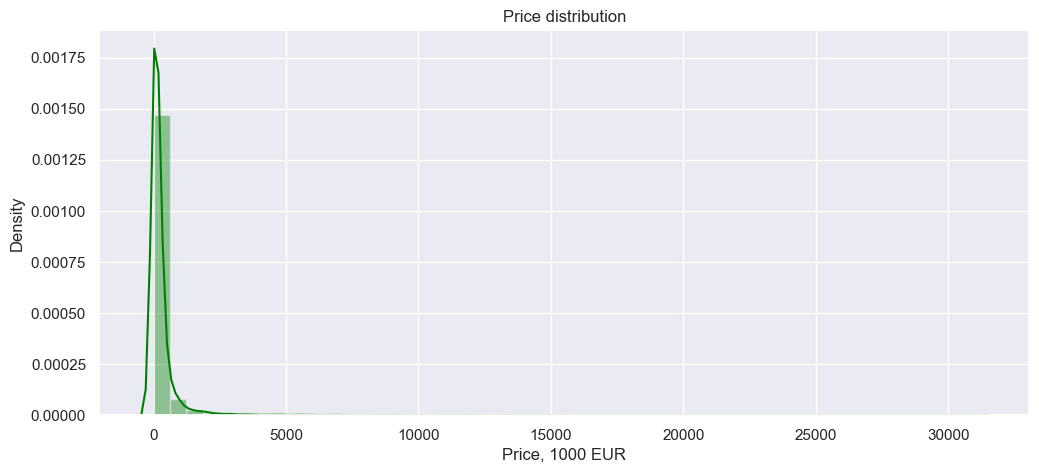

In [407]:
plt.figure(figsize = (12, 5))
sns.distplot(data.Price_K_EUR, color = 'g')
plt.title('Price distribution')
plt.xlabel('Price, 1000 EUR')
plt.ylabel('Density');

Most boats cost under 1 million euros. But there are also much more expensive boats.

Let's look separately at the distribution of boats priced under 1 million euros.

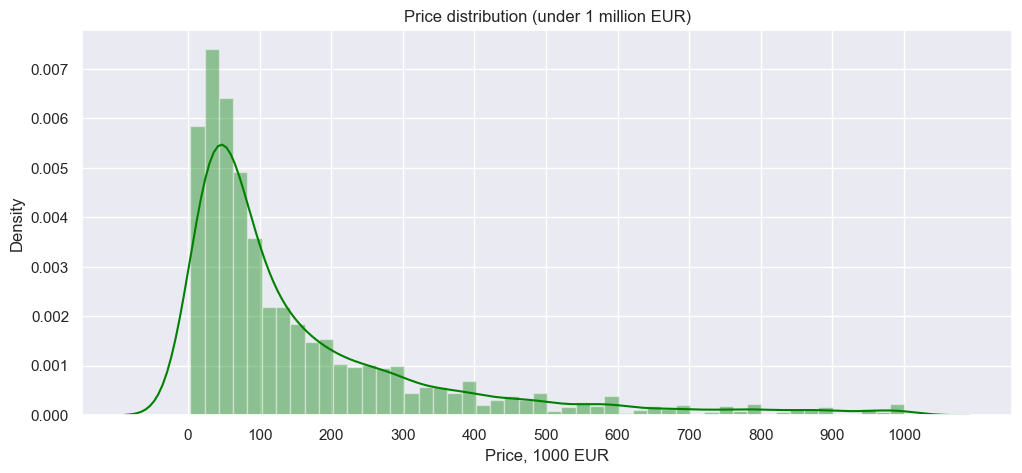

In [408]:
plt.figure(figsize = (12, 5))
sns.distplot(data.Price_K_EUR[data.Price_K_EUR <=1000], color = 'g')
plt.xticks(np.arange(0, 1100, 100))
plt.title('Price distribution (under 1 million EUR)')
plt.xlabel('Price, 1000 EUR')
plt.ylabel('Density');

Most of the boats are in the price range up to 100,000 euros. 

As the price increases, the supply decreases. This is logical: few buyers can afford a very expensive yacht, it is a unique product.

Now let's study what types of boats are represented on the website.

In [409]:
data['Boat Type'].value_counts()

Motor Yacht                       2676
Sport Boat                        1397
Flybridge                         1183
Trawler                            677
Pilothouse                         611
                                  ... 
Offshore Boat,Pilothouse             1
Bowrider,Cabin Boat,Deck Boat        1
Motor Yacht,Wakeboard/Wakesurf       1
Classic,Motor Yacht,Water ski        1
Classic,Runabout,Trawler             1
Name: Boat Type, Length: 126, dtype: int64

Let's look at the most popular types of boats:

In [410]:
data['Boat Type'].value_counts().head(25)

Motor Yacht            2676
Sport Boat             1397
Flybridge              1183
Trawler                 677
Pilothouse              611
Cabin Boat              582
Hardtop                 507
Center console boat     368
Bowrider                298
Deck Boat               279
Fishing Boat            172
House Boat              144
Mega Yacht              105
Pontoon Boat             91
Runabout                 71
Classic                  59
Classic,Runabout         58
Wakeboard/Wakesurf       56
Launch                   55
Offshore Boat            54
Working Boat             43
Passenger boat           32
Catamaran                26
Classic,Motor Yacht      26
Classic,Sport Boat       12
Name: Boat Type, dtype: int64

For the most of the boats, only 1 type is specified. But there are also listings where 2 or more are mentioned. It will be difficult to analyze this data. We will save only the first type from each listing.

In [411]:
def boat_type_extractor(string):
    if ',' in string:
        return string.split(',')[0]
    else:
        return string

In [412]:
data['Boat_type'] = data['Boat Type'].apply(boat_type_extractor)
data.Boat_type.value_counts()

Motor Yacht            2692
Sport Boat             1407
Flybridge              1191
Trawler                 677
Cabin Boat              651
Pilothouse              612
Hardtop                 513
Center console boat     375
Bowrider                307
Deck Boat               281
Classic                 201
Fishing Boat            178
House Boat              147
Mega Yacht              105
Pontoon Boat             91
Runabout                 75
Wakeboard/Wakesurf       58
Offshore Boat            57
Launch                   55
Working Boat             43
Passenger boat           35
Catamaran                26
Water ski                 9
Motorsailer               2
Ketch                     1
RIB                       1
Name: Boat_type, dtype: int64

There are several rare types of boats, let's merge them into the general category "Others".

In [413]:
boat_types = pd.Series(data.Boat_type.value_counts())
top_boat_types = boat_types[boat_types>=100].index

data['Boat_type'] = data['Boat_type'].where(data['Boat_type'].isin(top_boat_types), 'Others')

In [414]:
data.Boat_type.value_counts()

Motor Yacht            2692
Sport Boat             1407
Flybridge              1191
Trawler                 677
Cabin Boat              651
Pilothouse              612
Hardtop                 513
Others                  453
Center console boat     375
Bowrider                307
Deck Boat               281
Classic                 201
Fishing Boat            178
House Boat              147
Mega Yacht              105
Name: Boat_type, dtype: int64

Now let's explore the information about the manufacturers. 

We will leave the most popular manufacturers, and merge the smaller ones into the general category "Others".

In [415]:
manufacturers = pd.Series(data.Manufacturer.value_counts())
manufacturers

NA                             1314
BÃ©nÃ©teau power boats          629
Jeanneau power boats            537
Sunseeker power boats           369
Princess power boats            239
                               ... 
ISA Yachts power boats            1
Couach power boats                1
Perini Navi Spa power boats       1
Palmer Johnson power boats        1
Hunter power boats                1
Name: Manufacturer, Length: 908, dtype: int64

In [416]:
top_manufacturers = manufacturers[manufacturers > 100].index

In [417]:
len(top_manufacturers)

16

In [418]:
data['Manufacturer'] = data['Manufacturer'].where(data['Manufacturer'].isin(top_manufacturers), 'Others')
data['Manufacturer'].value_counts()

Others                                        4883
NA                                            1314
BÃ©nÃ©teau power boats                         629
Jeanneau power boats                           537
Sunseeker power boats                          369
Princess power boats                           239
Sea Ray power boats                            238
Cranchi power boats                            218
Azimut power boats                             213
Bavaria power boats                            183
Quicksilver (Brunswick Marine) power boats     167
Fairline power boats                           167
Sessa power boats                              147
Bayliner power boats                           141
Sealine power boats                            119
Quicksilver power boats                        118
Prestige Yachts power boats                    108
Name: Manufacturer, dtype: int64

The Type column combines two attributes:

- new boat / used boat;
- fuel type.

We will separate these features so that they can be used when training the model:

In [419]:
data.Type.value_counts()

Used boat,Diesel                4084
Used boat,Unleaded              1675
Used boat                       1446
new boat from stock,Unleaded    1105
new boat from stock              661
new boat from stock,Diesel       290
new boat on order,Unleaded       150
Display Model,Unleaded            75
new boat on order                 61
new boat on order,Diesel          61
Diesel                            57
Used boat,Electric                26
Unleaded                          21
Display Model,Diesel              19
new boat from stock,Electric      18
Display Model                     18
Used boat,Gas                     10
Display Model,Electric             6
new boat from stock,Gas            2
new boat from stock,Hybrid         1
Used boat,Hybrid                   1
Display Model,Gas                  1
Electric                           1
Used boat,Propane                  1
Name: Type, dtype: int64

In [420]:
data['Type'] = data['Type'].replace({'Used boat': 'Used boat,Unknown', 'new boat from stock': 'new boat from stock,Unknown', 'new boat on order': 'new boat on order,Unknown', 'Diesel': 'No info,Diesel', 'Unleaded': 'No info,Unleaded', 'Display Model': 'Display Model,Unknown', 'Electric': 'No info,Electric'})
data['Type'].value_counts()

Used boat,Diesel                4084
Used boat,Unleaded              1675
Used boat,Unknown               1446
new boat from stock,Unleaded    1105
new boat from stock,Unknown      661
new boat from stock,Diesel       290
new boat on order,Unleaded       150
Display Model,Unleaded            75
new boat on order,Unknown         61
new boat on order,Diesel          61
No info,Diesel                    57
Used boat,Electric                26
No info,Unleaded                  21
Display Model,Diesel              19
new boat from stock,Electric      18
Display Model,Unknown             18
Used boat,Gas                     10
Display Model,Electric             6
new boat from stock,Gas            2
new boat from stock,Hybrid         1
Used boat,Hybrid                   1
Display Model,Gas                  1
No info,Electric                   1
Used boat,Propane                  1
Name: Type, dtype: int64

In [421]:
data[['New/Used', 'Power_type']] = data['Type'].str.split(',', 1, expand = True)
data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,Currency,Price_K_EUR,Boat_type,New/Used,Power_type
0,3337,Motor Yacht,Others,"new boat from stock,Unknown",2017,4.00,1.90,NA,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3.47048,Motor Yacht,new boat from stock,Unknown
1,3490,Center console boat,Others,"new boat from stock,Unknown",2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3.49000,Center console boat,new boat from stock,Unknown
2,3770,Sport Boat,Others,"new boat from stock,Unknown",0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3.92080,Sport Boat,new boat from stock,Unknown
3,25900,Sport Boat,Others,"new boat from stock,Unknown",2020,3.00,1.00,NA,Denmark Â» Svendborg,64,DKK,3.54053,Sport Boat,new boat from stock,Unknown
4,3399,Fishing Boat,Others,"new boat from stock,Unknown",2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3.39900,Fishing Boat,new boat from stock,Unknown


In [422]:
data['New/Used'].value_counts()

Used boat              7243
new boat from stock    2077
new boat on order       272
Display Model           119
No info                  79
Name: New/Used, dtype: int64

We can see now that the most of the boats presented on the website were in use, but there are also new boats.

In [423]:
data['Power_type'].value_counts()

Diesel      4511
Unleaded    3026
Unknown     2186
Electric      51
Gas           13
Hybrid         2
Propane        1
Name: Power_type, dtype: int64

Almost half of all boats are powered by diesel.

In [424]:
data.loc[data['Power_type'].isin(['Gas', 'Hybrid', 'Propane']), 'Power_type'] = 'Other'

Now let's explore the age of the boats presented on the website:

In [425]:
data['Year Built'].describe()

count    9790.000000
mean     1892.499387
std       461.575903
min         0.000000
25%      1996.000000
50%      2007.000000
75%      2017.000000
max      2021.000000
Name: Year Built, dtype: float64

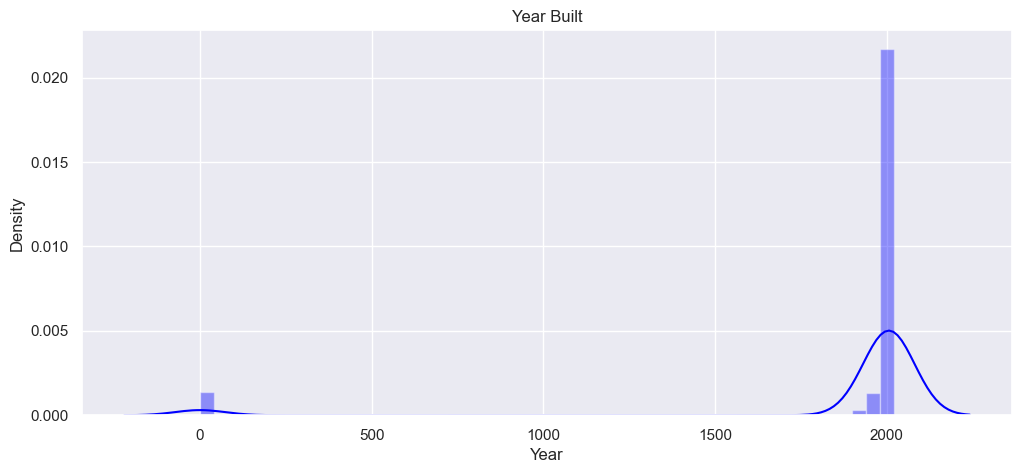

In [426]:
plt.figure(figsize = (12, 5))
sns.distplot(data['Year Built'], color = 'b')
plt.title('Year Built')
plt.xlabel('Year')
plt.ylabel('Density');

There is a large number of zeros, which probably indicate missing values.

It is better to replace the zeros with the median so that they wouldn't have a big impact on the distribution of the feature.

In [427]:
data[data['Year Built'] != 0]['Year Built'].median()

2008.0

In [428]:
data.loc[data['Year Built'] == 0, 'Year Built'] = 2008

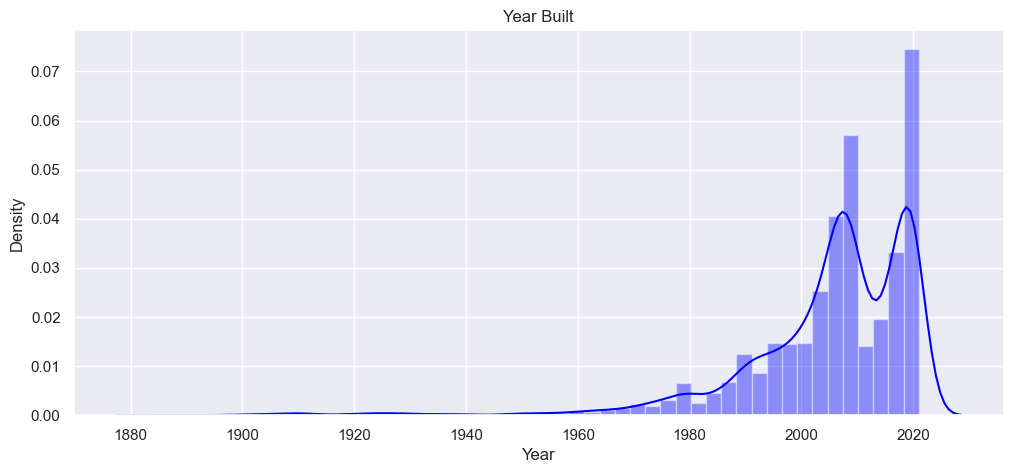

In [429]:
plt.figure(figsize = (12, 5))
sns.distplot(data['Year Built'], color = 'b')
plt.title('Year Built')
plt.xlabel('Year')
plt.ylabel('Density');

Let's look at the size of the boats:

In [430]:
data['Length'].describe()

count    9790.000000
mean       11.537413
std         5.970952
min         1.040000
25%         7.460000
50%        10.245000
75%        13.900000
max       100.000000
Name: Length, dtype: float64

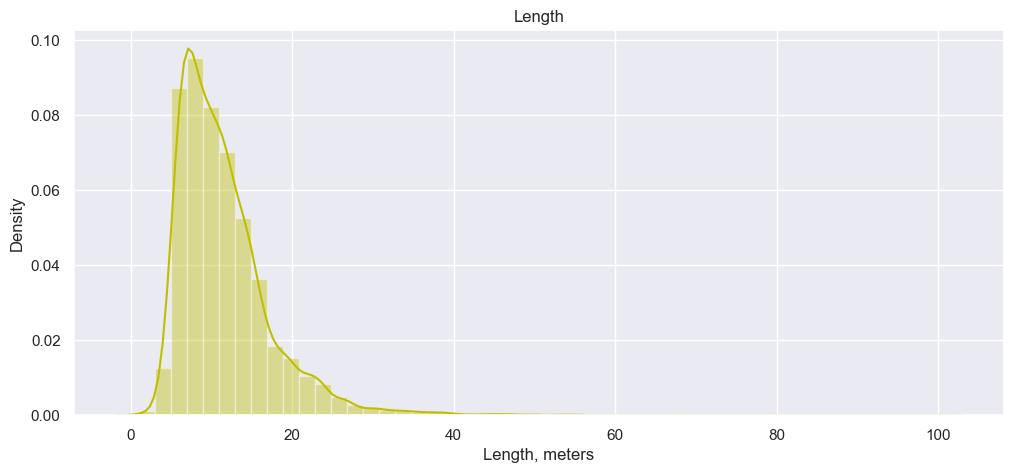

In [431]:
plt.figure(figsize = (12, 5))
sns.distplot(data['Length'], color = 'y')
plt.title('Length')
plt.xlabel('Length, meters')
plt.ylabel('Density');

In [432]:
data['Width'].describe()

count    9790.000000
mean        3.514004
std         1.213858
min         0.010000
25%         2.540000
50%         3.320000
75%         4.250000
max        25.160000
Name: Width, dtype: float64

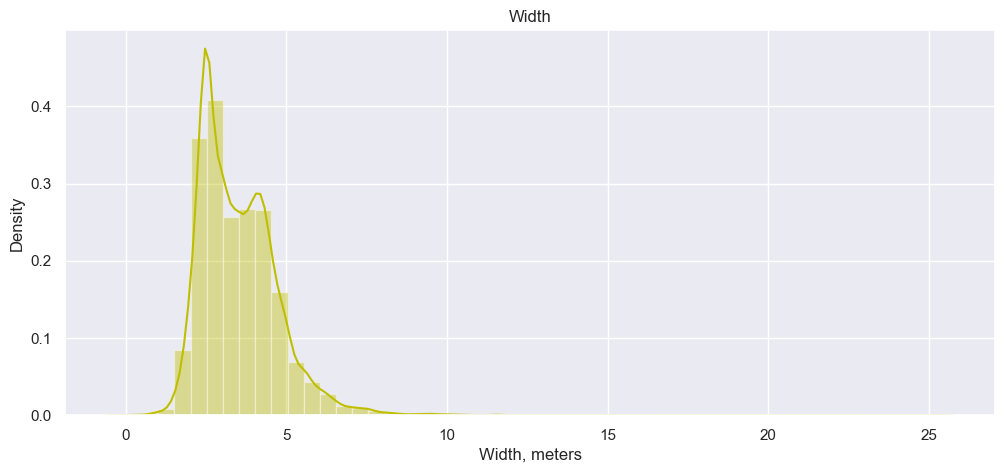

In [433]:
plt.figure(figsize = (12, 5))
sns.distplot(data['Width'], color = 'y')
plt.title('Width')
plt.xlabel('Width, meters')
plt.ylabel('Density');

The distributions of the length and width of the boats are skewed to the right: there are many objects whose indicators are very different from the standard sizes of boats.

In [434]:
data['Material'].value_counts()

GRP                    5436
NA                     1712
PVC                    1123
Steel                   933
Wood                    231
Aluminium               229
Plastic                  74
Carbon Fiber             30
Thermoplastic            15
Hypalon                   5
Reinforced concrete       1
Rubber                    1
Name: Material, dtype: int64

In [435]:
data.loc[data['Material'].isin(['Carbon Fiber', 'Thermoplastic', 'Hypalon', 'Reinforced concrete', 'Rubber']), 'Material'] = 'Other'

In [436]:
data['Material'].value_counts()

GRP          5436
NA           1712
PVC          1123
Steel         933
Wood          231
Aluminium     229
Plastic        74
Other          52
Name: Material, dtype: int64

In [437]:
data.Location.value_counts().head(20)

Netherlands Â» In verkoophaven                 309
Croatia (Hrvatska)                             240
Italy Â» Toscana Â» Toscana                    173
Italy                                          155
France                                         152
Italy Â» Mar Tirreno                           123
Italy Â» Campania Â» Campania                  110
Netherlands                                     96
Spain Â» Mallorca Â» Mallorca                   95
Germany                                         75
Croatia (Hrvatska) Â» INFO DD-YACHTING          69
Denmark Â» Svendborg                            68
Italy Â» Aprilia Marittima di Latisana (UD)     68
Italy Â» Liguria Â» Liguria                     68
Netherlands Â» onbekend                         65
Italy Â» Sardegna Â» Sardegna                   58
Italy Â» Veneto Â» Veneto                       56
Italy Â» Nord Adria                             53
Italy Â» Lazio Â» Lazio                         51
Germany Â» Hamburg Â» HAMBURG  

This location format is not suitable for further analysis. We will extract only the name of the country from the location description:

In [438]:
data['Country'] = data['Location'].map(lambda x: x.split(' ')[0])

In [439]:
data['Country'].value_counts().head(20)

Germany        1910
Italy          1773
France         1227
Switzerland    1108
Netherlands    1054
Croatia         802
Spain           697
United          238
Denmark         165
Portugal        133
Austria          88
Greece           83
Malta            71
Turkey           64
Belgium          62
Slovenia         39
Poland           39
Finland          35
Montenegro       21
Lake             16
Name: Country, dtype: int64

In [440]:
data[data.Country == 'United'].Location.value_counts().head(20)

United Kingdom Â» Lincoln, Lincoln                        25
United Kingdom Â» Poole                                   17
United Arab Emirates Â» Dubai & VAE                       17
United Kingdom Â» Southampton                             15
United Kingdom Â» Swanwick, Swanwick                      14
United Kingdom Â» Lincoln, Royaume Uni                    12
United Kingdom Â» Burton Waters, Burton Waters            12
United Kingdom Â» Burnham-on-Crouch, Burnham-on-Crouch     6
United Kingdom Â» Swanwick                                 6
United Kingdom Â» Torquay                                  6
United Kingdom Â» Chatham, Royaume Uni                     5
United Kingdom Â» LINCOLN, Royaume Uni                     5
United Kingdom Â» Ardrossan, Ardrossan                     5
United Kingdom Â» Chatham, Chatham                         4
United Kingdom Â» United Kingdom                           4
United Kingdom Â» LARGS, Royaume Uni                       3
United Kingdom Â» TROON,

In [441]:
data.loc[data.Location.str.startswith('United Kingdom'), 'Country'] = 'UK'

In [442]:
data.loc[data.Location.str.startswith('United Arab'), 'Country'] = 'UAE'

In [443]:
countries = pd.Series(data['Country'].value_counts())
top_countries = countries[countries > 50].index

In [444]:
data['Country'] = data['Country'].where(data['Country'].isin(top_countries), 'Others')
data['Country'].value_counts()

Germany        1910
Italy          1773
France         1227
Switzerland    1108
Netherlands    1054
Croatia         802
Spain           697
Others          338
UK              215
Denmark         165
Portugal        133
Austria          88
Greece           83
Malta            71
Turkey           64
Belgium          62
Name: Country, dtype: int64

Now let's study the distribution of the target feature:

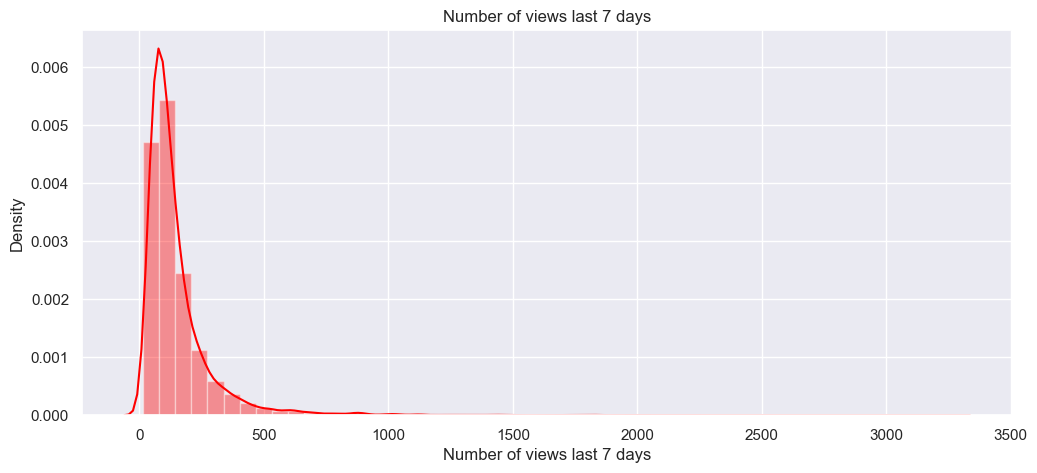

In [445]:
plt.figure(figsize = (12, 5))
sns.distplot(data['Number of views last 7 days'], color = 'r')
plt.title('Number of views last 7 days')
plt.xlabel('Number of views last 7 days')
plt.ylabel('Density');

In [446]:
data['Number of views last 7 days'].describe()

count    9790.000000
mean      149.366803
std       152.243472
min        13.000000
25%        70.000000
50%       108.000000
75%       172.000000
max      3263.000000
Name: Number of views last 7 days, dtype: float64

On average, one ad gets 100-150 views. More than 500 views per week is a uncommon thing.

At the same time, there are ads that get many times more views: up to 3000 per week and more.

What determines the number of views? We will return to this issue performing exploratory data analysis in the next section.

Let's eliminate unnecessary features and move on to the exploratory data analysis.

In [447]:
df = data.drop(['Price', 'Location', 'Currency', 'Boat Type', 'Type'], axis = 1)
df.head()

,Manufacturer,Year Built,Length,Width,Material,Number of views last 7 days,Price_K_EUR,Boat_type,New/Used,Power_type,Country
0,Others,2017,4.00,1.90,NA,226,3.47048,Motor Yacht,new boat from stock,Unknown,Switzerland
1,Others,2020,4.00,1.50,Other,75,3.49000,Center console boat,new boat from stock,Unknown,Germany
2,Others,2008,3.69,1.42,Aluminium,124,3.92080,Sport Boat,new boat from stock,Unknown,Switzerland
3,Others,2020,3.00,1.00,NA,64,3.54053,Sport Boat,new boat from stock,Unknown,Denmark
4,Others,2019,3.55,1.46,Aluminium,58,3.39900,Fishing Boat,new boat from stock,Unknown,Germany


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9790 entries, 0 to 9887
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Manufacturer                 9790 non-null   object 
 1   Year Built                   9790 non-null   int64  
 2   Length                       9790 non-null   float64
 3   Width                        9790 non-null   float64
 4   Material                     9790 non-null   object 
 5   Number of views last 7 days  9790 non-null   int64  
 6   Price_K_EUR                  9790 non-null   float64
 7   Boat_type                    9790 non-null   object 
 8   New/Used                     9790 non-null   object 
 9   Power_type                   9790 non-null   object 
 10  Country                      9790 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 917.8+ KB


We have cleaned up the data and prepared the features for further analysis and model training.

## Exploratory Analysis

Let's look again at the distribution of the number of views and try to understand what this value may depend on:

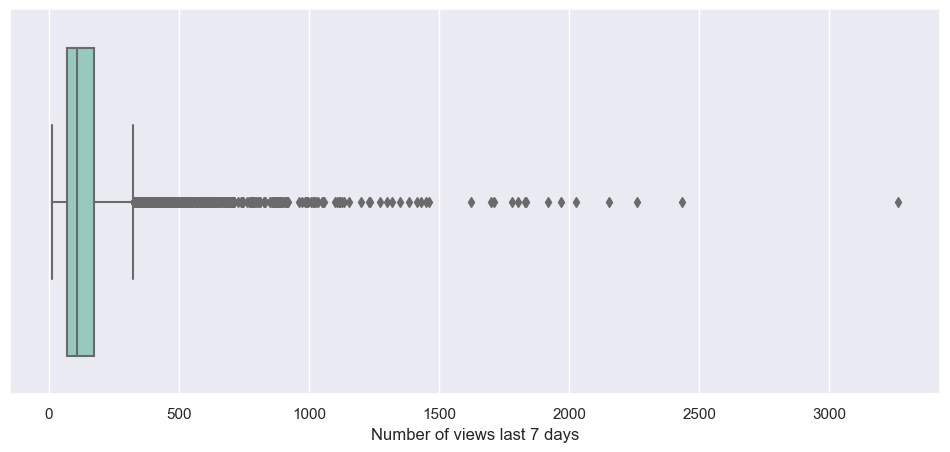

In [449]:
plt.figure(figsize = (12, 5))
sns.boxplot(df['Number of views last 7 days']);

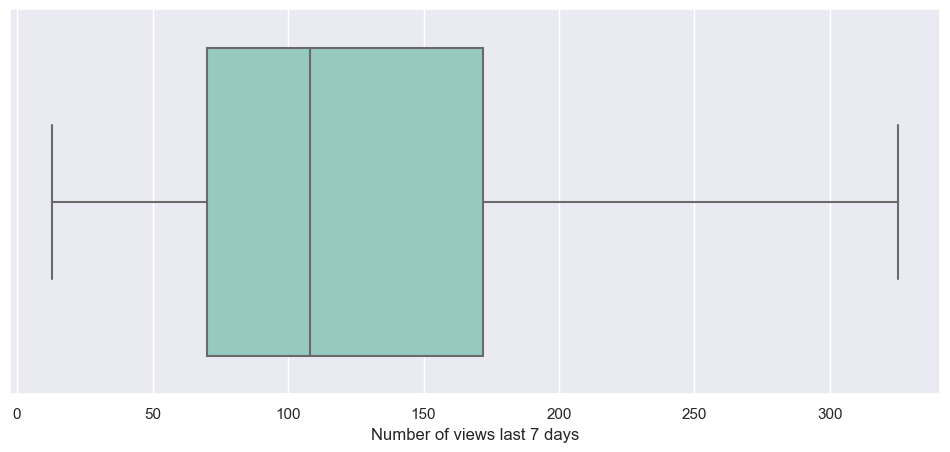

In [450]:
plt.figure(figsize = (12, 5))
sns.boxplot(df['Number of views last 7 days'], palette = 'Set3', sym = '');

The median number of views is slightly more than 100 views per week. Numbers over 350 views per week should be considered outliers.

What parameters can determine the number of views? Let's see if the distribution of the number of views changes depending on different features.

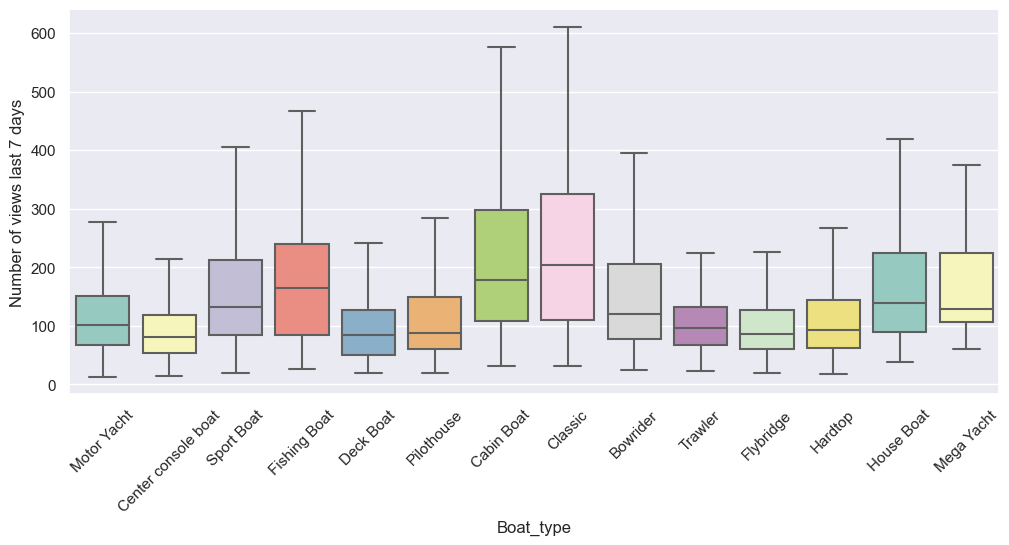

In [451]:
plt.figure(figsize = (12, 5))
sns.boxplot('Boat_type', 'Number of views last 7 days', data = df[df.Boat_type.isin(top_boat_types)], palette = 'Set3', sym = '')
plt.xticks(rotation = 45);

The number of views is obviously related to the type of boat. The most popular types of boats are Classic and Cabin Boat.

Fishing boat, House boat, Sport boat, Bowrider, Mega Yacht also get relatively many views.

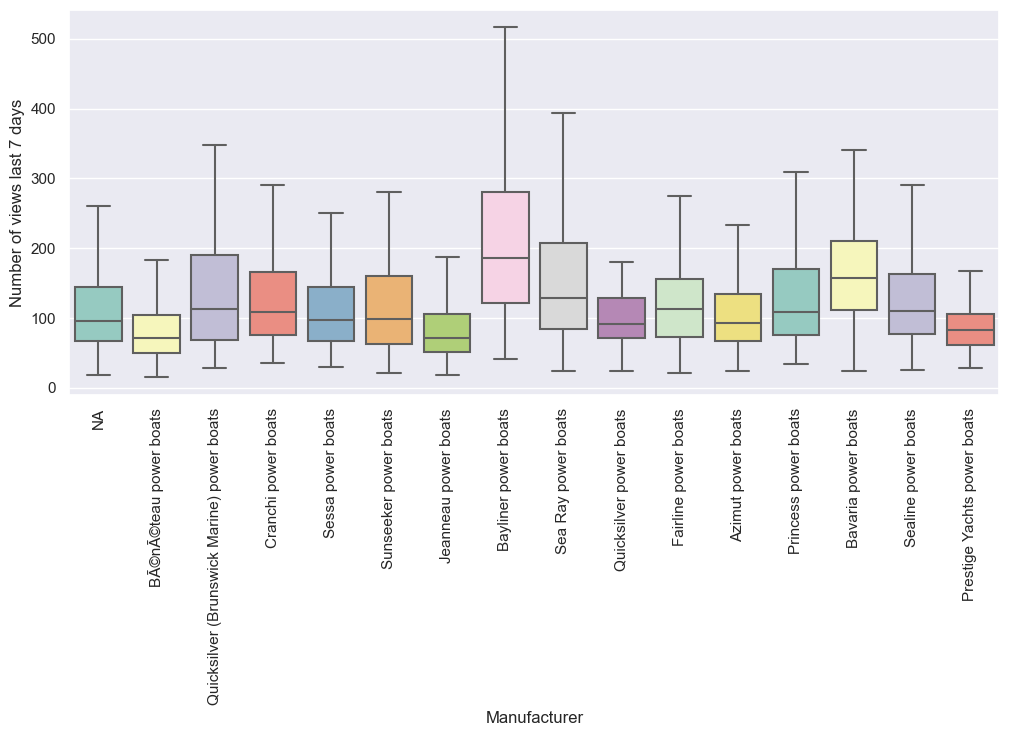

In [452]:
plt.figure(figsize = (12, 5))
sns.boxplot('Manufacturer', 'Number of views last 7 days', data = df[df.Manufacturer.isin(top_manufacturers)], palette = 'Set3', sym = '')
plt.xticks(rotation = 90);

Some manufacturers' boats get noticeably more views than others.

These include, for example, Bayliner, Bavaria, Sea Ray.

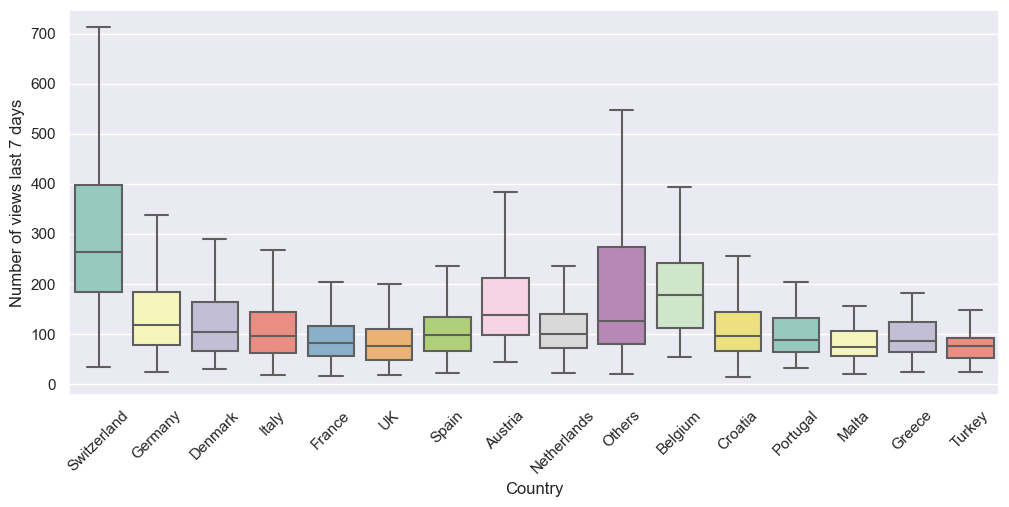

In [453]:
plt.figure(figsize = (12, 5))
sns.boxplot(df['Country'], df['Number of views last 7 days'], palette = 'Set3', sym = '')
plt.xticks(rotation = 45);

Boats from Switzerland, as well as Austria, Belgium, and Poland receive the most views.

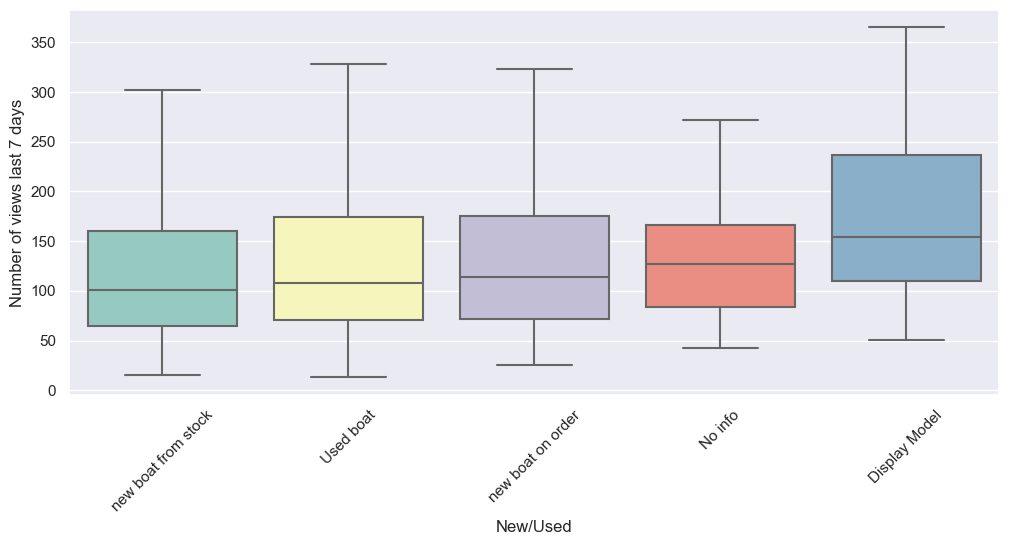

In [454]:
plt.figure(figsize = (12, 5))
sns.boxplot(df['New/Used'], df['Number of views last 7 days'], palette = 'Set3', sym = '')
plt.xticks(rotation = 45);

New and used boats get about the same number of views on average.

Display models get relatively more views. This could be due to more traffic, for example, from the official websites of manufacturers or from ads.

Is the number of views related to the price of the boat?

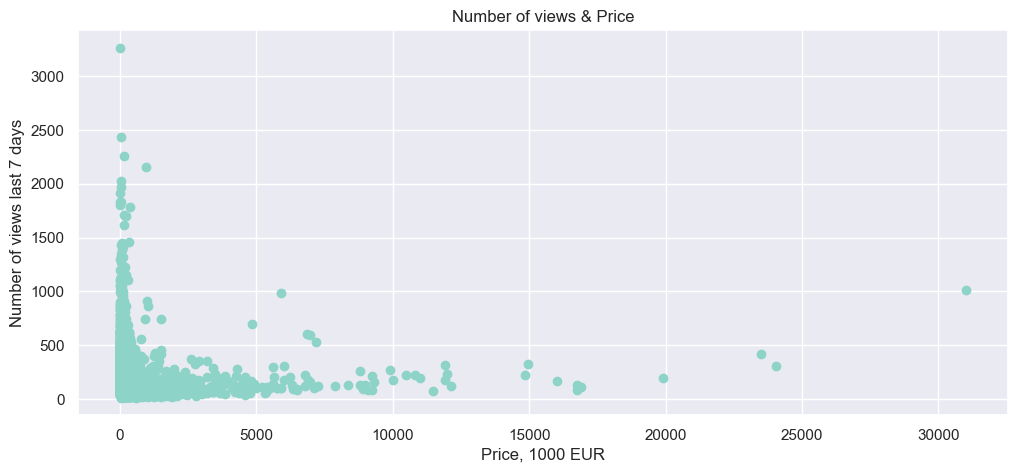

In [455]:
plt.figure(figsize = (12, 5))
plt.scatter(df['Price_K_EUR'], df['Number of views last 7 days'])
plt.title('Number of views & Price')
plt.xlabel('Price, 1000 EUR')
plt.ylabel('Number of views last 7 days');

Relatively inexpensive boats get the most views. This seems logical: the demand for boats that are more affordable is higher than for exclusive expensive yachts. 

At the same time, very expensive objects can also receive relatively many views. Most likely, people are looking these boats just out of curiosity.

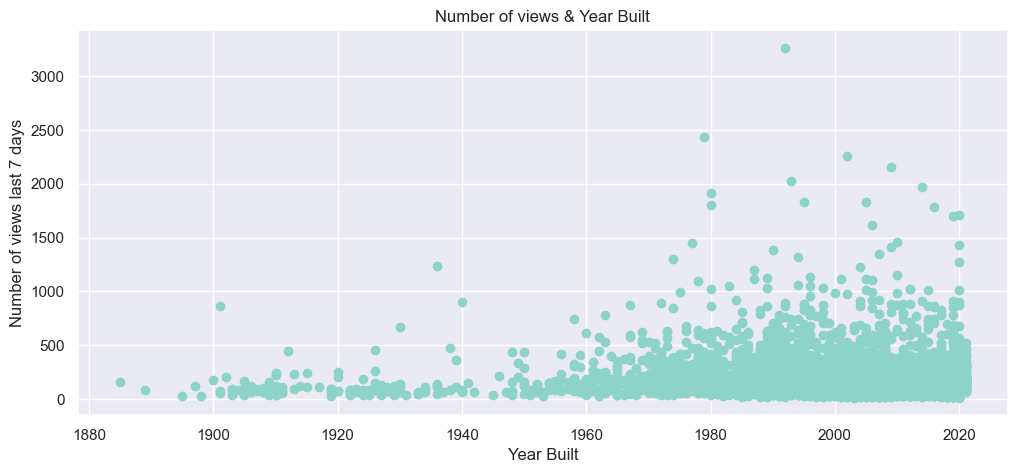

In [456]:
plt.figure(figsize = (12, 5))
plt.scatter(df['Year Built'], df['Number of views last 7 days']);
plt.title('Number of views & Year Built')
plt.xlabel('Year Built')
plt.ylabel('Number of views last 7 days');

The relation with the age of the boat is also obvious: newer boats get the most views.

We have performed exploratory data analysis and found out that target value (number of views) is definitely related with such parameters of boats as Price, Country, Boat Type, Manufacturer, Year Built.

In the next section we'll train ML models to predict the number of views.

## Model Development and Evaluation

Our task is to train a model to predict the number of views based on the parameters of a boat.

We will prepare data for models training, then we will train the models and evaluate their results.

We will use random forest and gradient boosting algorithms. These are the most effective machine learning algorithms for tabular data to date, which are widely used for tasks like this (supervised learning, regression problem).

We will use MAPE (mean absolute percentage error) as a quality metric, as the product manager would consider using the model if, on average, the predictions are only 50% off of the true number of views a listing would receive.

MAE (mean absolute error) is used as a loss function, since there are many outliers in the target variable, so it is better not to use MSE (mean squared error).

- We should divide the dataset into a training and a test sample to evaluate the results of the model on new data.

- We will encode categorical features so that our models could work with them.

- We will also scale the numerical features to facilitate the work of the algorithm.

In [457]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [458]:
features = df.drop('Number of views last 7 days', axis = 1)
target = df['Number of views last 7 days']

In [459]:
categorical = features.select_dtypes('object').columns
numeric = features.select_dtypes(include = ['int', 'float']).columns

In [460]:
encoder = LabelEncoder()
features[categorical] = features[categorical].apply(lambda x: encoder.fit_transform(x))

In [461]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state = 12345)

In [462]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Let's train a **random forest model**:

In [464]:
%%time

rf = RandomForestRegressor(criterion = 'absolute_error', random_state = 12345)
rf.fit(features_train, target_train)
target_pred = rf.predict(features_test)

print('MAPE (validation):', np.mean(abs(cross_val_score(rf, features_train, target_train, cv = 5, scoring = 'neg_mean_absolute_percentage_error'))))
print('MAPE (test):', mean_absolute_percentage_error(target_test, target_pred))

MAPE (validation): 0.5396601656587736
MAPE (test): 0.536939899148756
CPU times: user 6min 57s, sys: 204 ms, total: 6min 57s
Wall time: 6min 57s


The result of the model is worse than required (MAPE > 50%). In addition, the model takes too long to train. But we can use this model as a baseline.

Let's train a **gradient boosting model** based on decision trees:

In [466]:
%%time

gb = GradientBoostingRegressor(loss = 'absolute_error', random_state = 12345)
gb.fit(features_train, target_train)
target_pred = gb.predict(features_test)

print('MAPE (validation):', np.mean(abs(cross_val_score(gb, features_train, target_train, cv = 5, scoring = 'neg_mean_absolute_percentage_error'))))
print('MAPE (test):', mean_absolute_percentage_error(target_test, target_pred))

MAPE (validation): 0.4347344815441348
MAPE (test): 0.45106578262424096
CPU times: user 5.58 s, sys: 38 µs, total: 5.58 s
Wall time: 5.58 s


The result of the model both on cross-validation and on the test sample is much better.

The model also trains quickly.

Let's see if we can improve the result by choosing optimal hyperparameters.

In [468]:
%%time

params = {'learning_rate': [0.01, 0.1], 'n_estimators': [500, 700], 'max_depth': [5, 7]}

gb = GradientBoostingRegressor(loss = 'absolute_error', random_state = 12345)
gb_rs = GridSearchCV(gb, param_grid = params, scoring = 'neg_mean_absolute_percentage_error', cv = 5, n_jobs = -1)

gb_rs.fit(features_train, target_train)

print('Best parameters:', gb_rs.best_params_)
print('Best MAPE (validation):', abs(gb_rs.best_score_))

gb_rs_pred = gb_rs.predict(features_test)

print('MAPE (test):', mean_absolute_percentage_error(target_test, gb_rs_pred))

Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 700}
Best MAPE (validation): 0.4300281517832941
MAPE (test): 0.4432125352561094
CPU times: user 20.8 s, sys: 64.3 ms, total: 20.8 s
Wall time: 4min 17s


In [469]:
%%time

gb = GradientBoostingRegressor(loss = 'absolute_error', n_estimators = 700, max_depth = 7, learning_rate = 0.01, random_state = 12345)
gb.fit(features_train, target_train)
target_pred = gb.predict(features_test)

print('MAPE (validation):', np.mean(abs(cross_val_score(gb, features_train, target_train, cv = 5, scoring = 'neg_mean_absolute_percentage_error'))))
print('MAPE (test):', mean_absolute_percentage_error(target_test, target_pred))

MAPE (validation): 0.4300281517832941
MAPE (test): 0.4432125352561094
CPU times: user 1min 50s, sys: 60 ms, total: 1min 50s
Wall time: 1min 50s


The result of the model has improved slightly. We could try to improve the result, but for now will stay on this model, as its result meets the requirements of the manager: MAPE < 50%.

But how to interpret the result of the model? After all, we are required to give specific recommendations on how to increase the number of ads views / reduce the number of ineffective ads that receive few views.

To do this, let's evaluate the importance of the features: what exactly are the parameters of the objects that the model relies on in the first place, predicting the number of ads views?

## Recommendations

Let's compare the feature importance of the two models (random forest and gradient boosting).

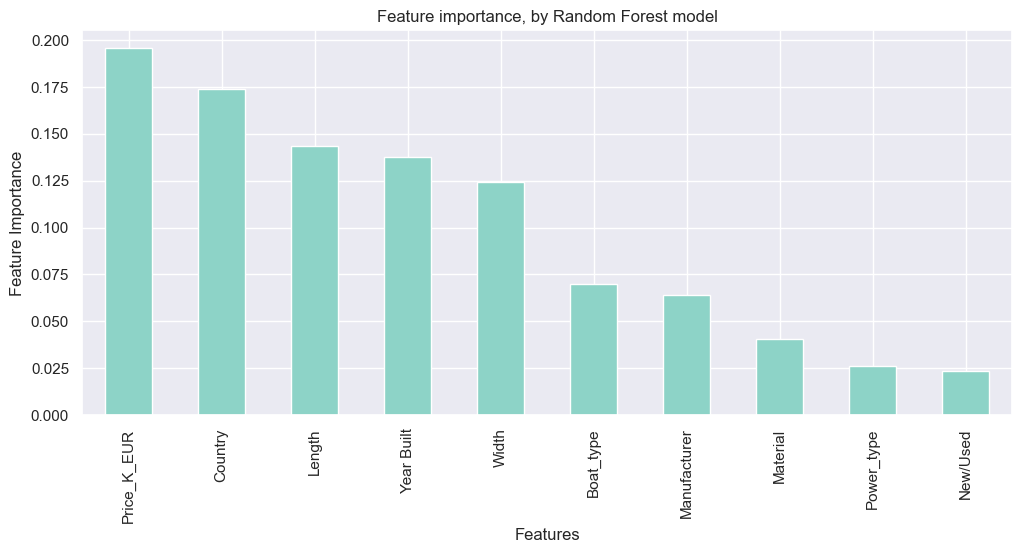

In [470]:
fimp_rf = pd.Series(rf.feature_importances_, index = features_train.columns).sort_values(ascending = False)
fimp_rf[fimp_rf >= 0.01].plot(kind = 'bar', figsize = (12, 5))
plt.title('Feature importance, by Random Forest model')
plt.xlabel('Features')
plt.ylabel('Feature Importance');

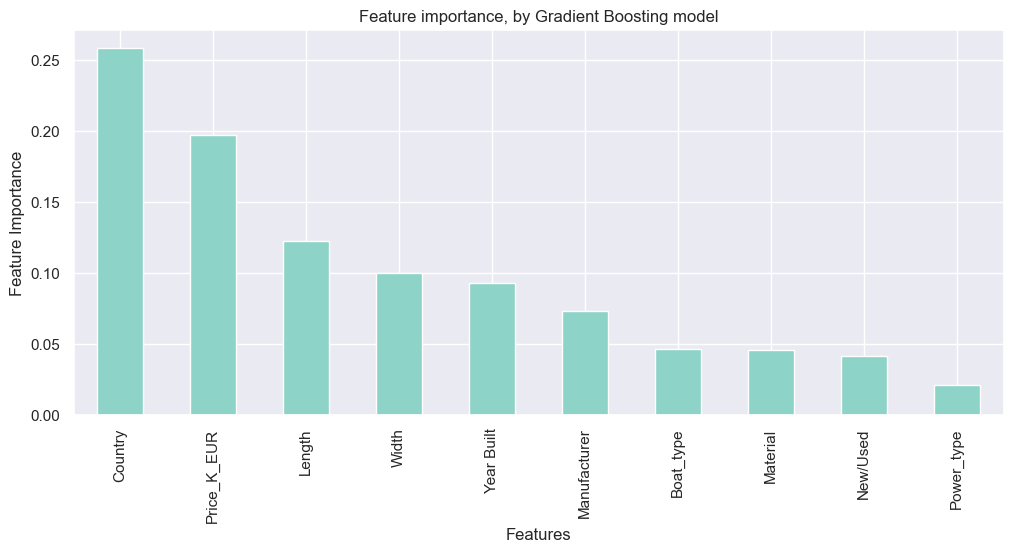

In [471]:
fimp_gb = pd.Series(gb.feature_importances_, index = features_train.columns).sort_values(ascending = False)
fimp_gb[fimp_gb >= 0.01].plot(kind = 'bar', figsize = (12, 5))
plt.title('Feature importance, by Gradient Boosting model')
plt.xlabel('Features')
plt.ylabel('Feature Importance');

The most important features that determine the number of views are price, country, size, age, manufacturer. This aligns with our previous findings.

The main features are Price and Country. 

What exactly can Nearly New Nautical do to boost traffic to the website?

**Country**

The number of views a listing will receive depends on the boat's country: is it due to the difference of demand for the boats in distinct countries or due to higher/lower popularity of the website in different countries? 

In the second case, the company should consider additional promotion of the website in the countries with high demand for the boats (i.e. SEO and online ads). This should lead to views and sales increase.

**Price**

It can be assumed that few views are received by those boats whose price does not match their characteristics, that are, overvalued. It is worth conducting additional data analysis.

If the hypothesis is confirmed, I'd recommend to develop a model that will advise lowering the price, if necessary, and/or predict the number of impressions for the set price.

It could be profitable to introduce additional functionality that will help sellers to set fairer prices for boats, which means to increase both the number of views and the number of purchases.

**Bonus: Problem statement**

To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views.

I'd suggest conducting additional research of the traffic of the website. What are the main traffic sources? How do users behave on the website?

The focus should probably be changed from 'preventing listing boats that do not receive many views' to improving user experience. 

Having few views doesn't necessarily mean that the ad is not effective and won't lead to a sale. Imagine an exclusive very expensive yacht. Would it get a lot of views? Probably not. Would it be sold if the potential customer sees the listing on the website? Probably yes.

Listing boats that do not receive many views shouldn't actually lead to losing traffic and sales if the website has a large variety of boats ads, clear navigation and convenient search tools.

For example, I'd advise using recommendation blocks on the pages of the website. If a user doesn't like a particular boat, he can be interested in other similar ads suggested, thus the company won't lose traffic and potential customers.

## Final Summary

- We have performed exploratory data analysis and found out that number of views is definitely related with such parameters of boats as *Price, Country, Boat Type, Manufacturer, Year Built*.
.
- We tried **random forest** and **gradient boosting** algorithms. We used **MAPE (mean absolute percentage error)** as a quality metric, as the product manager would consider using the model if, on average, the predictions are 50% off of the true number of views a listing would receive.
.
- The *best model's (GradientBoostingRegressor)* results are:

	MAPE (validation): 0.43

	MAPE (test): 0.44

That means that, on average, **the predictions are 44% off of the true number of views a listing would receive**, thus, the model meets the requirements of the manager.

.
- After training and evaluating the model we have evaluated the importance of the features to find out the parameters of the objects that the model relies on in the first place. 

The most important features that determine the number of views are *price, country, size, age, manufacturer*. The main features are **Price** and **Country**.

- As a result of the work conducted we have come up with some **recommendations for Nearly New Nautical**, including:

1) considering  additional promotion of the website in the countries with high demand for the boats;
2) introducing additional functionality to the website that will help sellers to set fairer prices for boats;
3) changing the focus from 'preventing listing boats that do not receive many views' to improving user experience (i.e. using useful recommendations on the website).